# Challenge: Make Your Network

Create a multi-layer perceptron neural network model to predict on a labeled dataset of your choosing. Compare this model to either a boosted tree or a random forest model and describe the relative tradeoffs between complexity and accuracy. Be sure to vary the hyperparameters of your MLP!

## Data set 

Abalone Dataset https://www.kaggle.com/rodolfomendes/abalone-dataset#abalone.csv

Context
The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

Original Dataset
The original dataset can be acessed at https://archive.ics.uci.edu/ml/datasets/abalone.

Features:
SexM, F, and I (infant)
LengthLongest shell measurement
Diameterperpendicular to length
Heightwith meat in shell
Whole weightwhole abalone
Shucked weightweight of meat
Viscera weightgut weight (after bleeding)
Shell weightafter being dried
Rings+1.5 gives the age in years


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns
sns.set(style="ticks", color_codes=True)

import chardet
import codecs

from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

import folium
from folium import plugins
from scipy import stats

%matplotlib inline
plt.style.use('seaborn-white')

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
abalone = pd.read_csv('/Users/mille/Desktop/Unsupervised Learning/abalone.csv', low_memory=False)
print('Dataframe dimensions:', abalone.shape)



Dataframe dimensions: (4177, 9)


In [3]:
abalone.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
abalone.count()

Sex               4177
Length            4177
Diameter          4177
Height            4177
Whole_weight      4177
Shucked_weight    4177
Viscera_weight    4177
Shell_weight      4177
Rings             4177
dtype: int64

In [5]:
abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
Sex               4177 non-null object
Length            4177 non-null float64
Diameter          4177 non-null float64
Height            4177 non-null float64
Whole_weight      4177 non-null float64
Shucked_weight    4177 non-null float64
Viscera_weight    4177 non-null float64
Shell_weight      4177 non-null float64
Rings             4177 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [6]:
abalone.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


# Exploratory Data Analysis

In [7]:
#Just continious features 
cont_data=abalone.loc[:,'Length':'Rings']

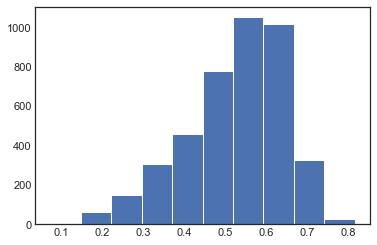

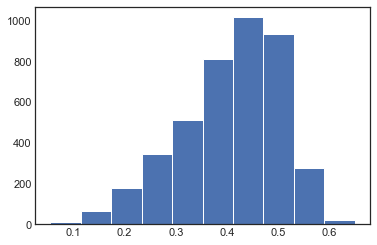

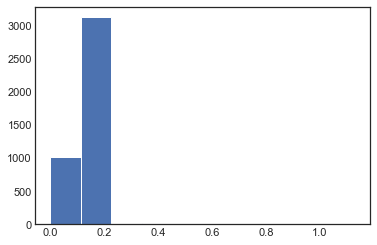

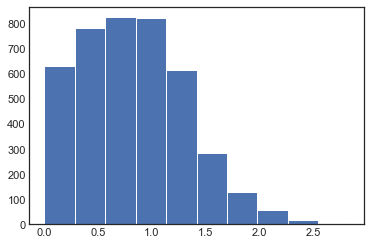

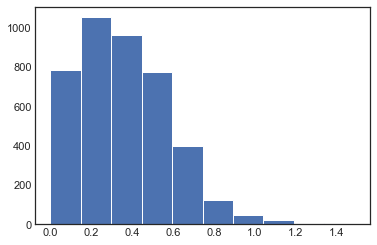

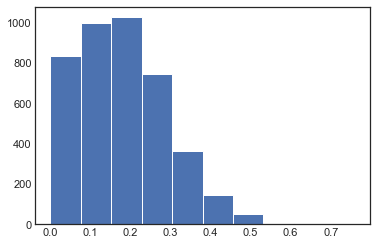

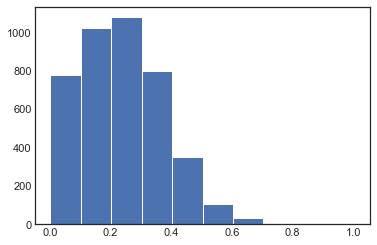

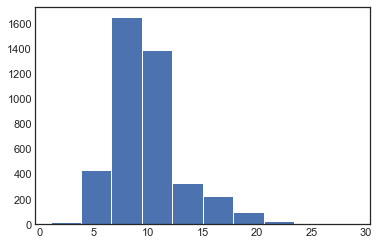

In [8]:
for i, col in enumerate(cont_data.columns):
    plt.figure(i)
    plt.hist(cont_data[col])

**Histogram continious features**

**All measurement values are in millimeters**

**Weight is measured in grams**

Sex / nominal / -- / M, F, and I (infant) 
Length / continuous / mm / Longest shell measurement 
Diameter	/ continuous / mm / perpendicular to length 
Height / continuous / mm / with meat in shell 
Whole weight / continuous / grams / whole abalone 
Shucked weight / continuous	/ grams / weight of meat 
Viscera weight / continuous / grams / gut weight (after bleeding) 
Shell weight / continuous / grams / after being dried 
Rings / integer / -- / +1.5 gives the age in years

1. Length - The length of abalone is skewed to the right. With mean at 0.523.  
2. Diameter - The diameter of abalone is skewed to the right. With the mean at 0.407.      
3. Height - The height is strongly skewed to the left. With a mean of 0.139. 
4. Whole_weight - Slightly skewed to the left resembling a bell shape. 
5. Shucked_weight - Strongly skewed to the left. Mean of 0.359367
6. Viscera_weight - Very similar to shucked weight. However the mean is 0.180594
7. Shell_weight  - More closely resembles a bell curve. Mean of 0.238831
8. Rings - Bell curve with very narrow bell curve. Mean of 9.933684

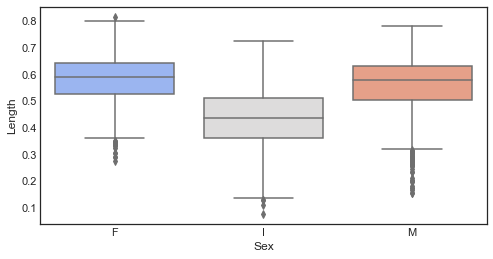

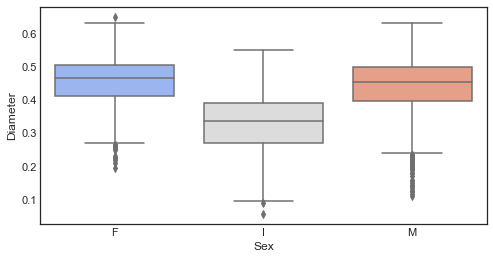

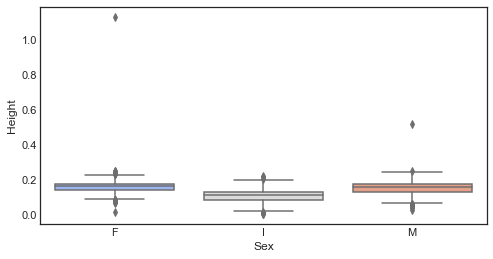

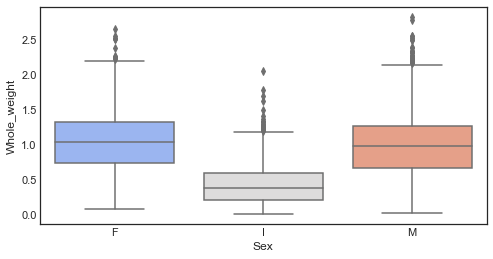

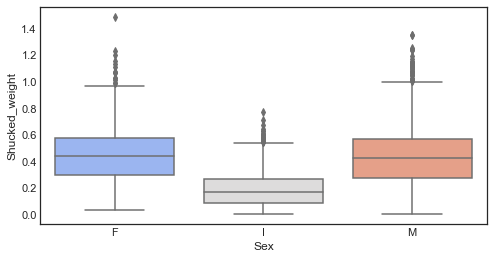

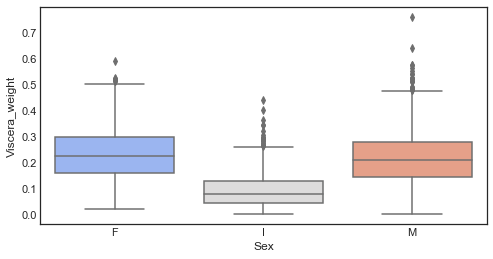

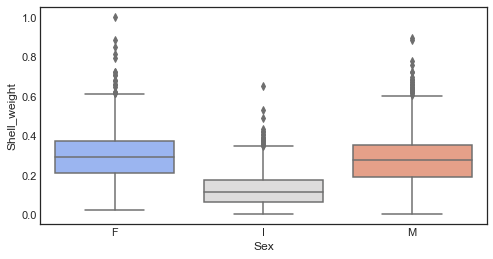

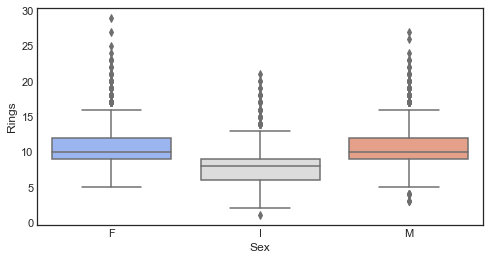

In [9]:
abalone['Sex']=abalone['Sex'].astype('category') #To convert target class into category

for i, col in enumerate(cont_data.columns):
    plt.figure(i,figsize=(8,4))
    sns.boxplot(x=abalone['Sex'], y=col, data=abalone, palette="coolwarm")

**Boxplots with Sex (categorical)**


1. Length - F(female) has a wider ranger then M(males) about only slightly. I(infants) mean is much smaller.     
2. Diameter - Both F/M are roughly the same mean, while I is twice as small. 
3. Height - F contais an outlier data point above 1.0. Where M contains a data point at 0.5. 
4. Whole_weight - Weight is roughly similar between F/M while I is twice as small. 
5. Shucked_weight -  Weight is roughly similar between F/M while I is twice as small. 
6. Viscera_weight -  Weight is roughly similar between F/M while I is twice as small. Male range is wider. 
7. Shell_weight - Weight is roughly similar between F/M while I is twice as small. Female range is wider. 
8. Rings - Rings is roughly similar between F/M while I is twice as small. Female range extends to 30.

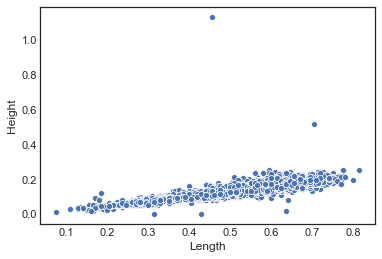

In [10]:
ax = sns.scatterplot(x="Length", y="Height", data=abalone)

### Identifying outlier in dataset. This is the Female Height data is significantly more different then the rest of the data set. 

In [11]:
print(abalone.head())

  Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  Viscera_weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell_weight  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7  


In [12]:
print(abalone)

Q1 = abalone.quantile(0.25)
Q3 = abalone.quantile(0.75)
IQR = Q3 - Q1

df = abalone[~((abalone < (Q1 - 1.5 * IQR)) |(abalone > (Q3 + 1.5 * IQR))).any(axis=1)]

print (df)

     Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  \
0      M   0.455     0.365   0.095        0.5140          0.2245   
1      M   0.350     0.265   0.090        0.2255          0.0995   
2      F   0.530     0.420   0.135        0.6770          0.2565   
3      M   0.440     0.365   0.125        0.5160          0.2155   
4      I   0.330     0.255   0.080        0.2050          0.0895   
5      I   0.425     0.300   0.095        0.3515          0.1410   
6      F   0.530     0.415   0.150        0.7775          0.2370   
7      F   0.545     0.425   0.125        0.7680          0.2940   
8      M   0.475     0.370   0.125        0.5095          0.2165   
9      F   0.550     0.440   0.150        0.8945          0.3145   
10     F   0.525     0.380   0.140        0.6065          0.1940   
11     M   0.430     0.350   0.110        0.4060          0.1675   
12     M   0.490     0.380   0.135        0.5415          0.2175   
13     F   0.535     0.405   0.145        0.6845

ValueError: cannot broadcast shape [(4177,)] with block values [(1,)]

In [13]:
abalone['Height'].max()

1.13

In [15]:
new_ab=abalone.loc[abalone['Height']!=1.13,:]

In [16]:
new_ab1=new_ab.loc[new_ab['Height']!=0.515,:]

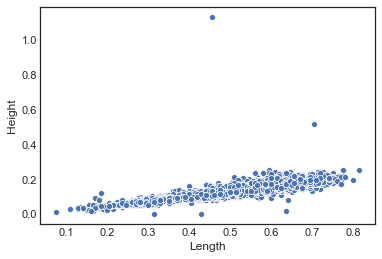

In [17]:
ax = sns.scatterplot(x="Length", y="Height", data=abalone)

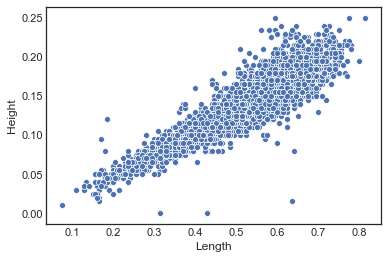

In [18]:
ax = sns.scatterplot(x="Length", y="Height", data=new_ab1)

*Filtered out the outlier in Females 1.13 and filtered out Males 0.515.*

In [19]:
new_ab1.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000
mean,0.523965,0.407856,0.139189,0.828468,0.359195,0.180536,0.238791,9.934132
std,0.120084,0.099230,0.038489,0.490027,0.221713,0.109534,0.139162,3.224802
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093250,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.501750,0.252750,0.328750,11.000000
max,0.815000,0.650000,0.250000,2.825500,1.488000,0.760000,1.005000,29.000000


In [20]:
new_ab1['Sex'] = new_ab1['Sex'].apply({ 'F': 1,
  'M': 2,
  'I': 0}.get)

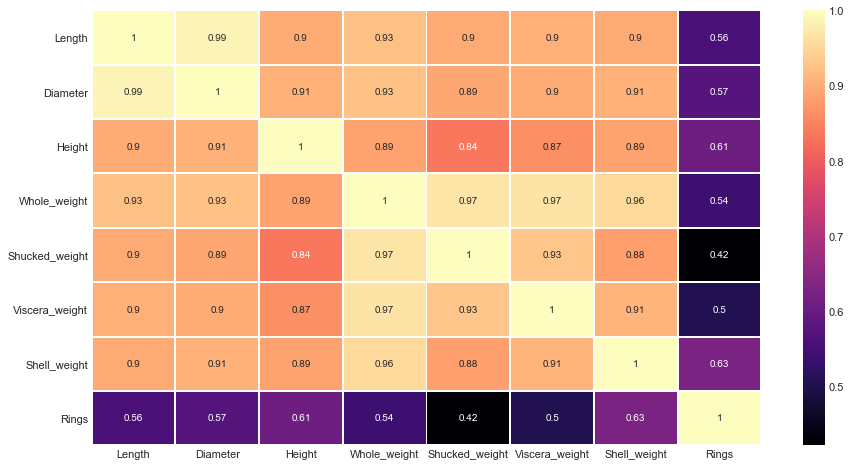

In [21]:
plt.figure(figsize=(15,8))
sns.heatmap(new_ab1.corr(),cmap='magma',linecolor='white',linewidths=1,annot=True)

## Assigned gender F/M/I to: F = 1, M = 2, I = 0

In [22]:
new_ab1.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [23]:
# Final column drops and NA drop.
X = new_ab1.drop(['Sex', 'Rings'], 1)

# Create dummies separately.
sex = pd.get_dummies(new_ab1.Sex)
rings = pd.get_dummies(new_ab1.Rings)

# Concat with other variables, but artists slows this wayyyyy down so we'll keep it out for now
X = pd.get_dummies(X, sparse=True)
X = pd.concat([X, rings, sex], axis=1)

Y = new_ab1.Sex

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, Y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, Y)


In [25]:
# Import the model.
from sklearn.neural_network import MLPClassifier

# Establish and fit the model, with a single, 1000 perceptron layer.
mlp = MLPClassifier(hidden_layer_sizes=(100,2))
mlp.fit(X, Y)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [26]:
import time
start = time.time()
a = range(100000)
b = []
for i in a:
    b.append(i*2)
end = time.time()
print(end - start)

0.023935556411743164


In [27]:
mlp.score(X, Y)

0.96

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
from sklearn.model_selection import cross_val_score
cross_val_score(mlp, X, Y, cv=5)

array([0.5 , 1.  , 0.5 , 0.95, 0.5 ])

# Second trial 

Dropping additional columns

In [30]:
new_ab1.head(5)

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [44]:
# Final column drops and NA drop.
X = new_ab1.drop(['Sex', 'Rings', 'Viscera_weight', 'Shell_weight', 'Shucked_weight'], 1)

# Create dummies separately.
vw = pd.get_dummies(new_ab1.Viscera_weight)
sw = pd.get_dummies(new_ab1.Shell_weight)
suw = pd.get_dummies(new_ab1.Shucked_weight)


# Concat with other variables, but artists slows this wayyyyy down so we'll keep it out for now
X = pd.get_dummies(X, sparse=True)
X = pd.concat([X, suw, sw], axis=1)

Y = new_ab1.Sex

**Hyperparameters**

In [45]:
# Import the model.
from sklearn.neural_network import MLPClassifier

# Establish and fit the model, with a single, 1000 perceptron layer.
mlp = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=500, alpha=0.0001,
                     solver='sgd', verbose=10,  random_state=21,tol=0.000000001)
mlp.fit(X, Y)

Iteration 1, loss = 1.11993971
Iteration 2, loss = 1.11127672
Iteration 3, loss = 1.10413405
Iteration 4, loss = 1.09967695
Iteration 5, loss = 1.09631673
Iteration 6, loss = 1.09391096
Iteration 7, loss = 1.09170460
Iteration 8, loss = 1.08970854
Iteration 9, loss = 1.08779416
Iteration 10, loss = 1.08581393
Iteration 11, loss = 1.08377367
Iteration 12, loss = 1.08171411
Iteration 13, loss = 1.07957957
Iteration 14, loss = 1.07738805
Iteration 15, loss = 1.07492613
Iteration 16, loss = 1.07228997
Iteration 17, loss = 1.06939140
Iteration 18, loss = 1.06611818
Iteration 19, loss = 1.06268507
Iteration 20, loss = 1.05909654
Iteration 21, loss = 1.05546275
Iteration 22, loss = 1.05172682
Iteration 23, loss = 1.04787889
Iteration 24, loss = 1.04380715
Iteration 25, loss = 1.03962738
Iteration 26, loss = 1.03520319
Iteration 27, loss = 1.03066003
Iteration 28, loss = 1.02591045
Iteration 29, loss = 1.02090536
Iteration 30, loss = 1.01574507
Iteration 31, loss = 1.01033404
Iteration 32, los

Iteration 253, loss = 0.78624966
Iteration 254, loss = 0.78527047
Iteration 255, loss = 0.78416366
Iteration 256, loss = 0.78359199
Iteration 257, loss = 0.78228055
Iteration 258, loss = 0.78115532
Iteration 259, loss = 0.78022981
Iteration 260, loss = 0.77900343
Iteration 261, loss = 0.77818801
Iteration 262, loss = 0.77704683
Iteration 263, loss = 0.77595642
Iteration 264, loss = 0.77479164
Iteration 265, loss = 0.77371899
Iteration 266, loss = 0.77284845
Iteration 267, loss = 0.77177054
Iteration 268, loss = 0.77056557
Iteration 269, loss = 0.76947619
Iteration 270, loss = 0.76842787
Iteration 271, loss = 0.76714156
Iteration 272, loss = 0.76626724
Iteration 273, loss = 0.76544822
Iteration 274, loss = 0.76400846
Iteration 275, loss = 0.76286334
Iteration 276, loss = 0.76166155
Iteration 277, loss = 0.76065381
Iteration 278, loss = 0.75988698
Iteration 279, loss = 0.75844692
Iteration 280, loss = 0.75739883
Iteration 281, loss = 0.75646176
Iteration 282, loss = 0.75506284
Iteration 

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 100, 100), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=21, shuffle=True, solver='sgd', tol=1e-09,
       validation_fraction=0.1, verbose=10, warm_start=False)

In [46]:
import time
start = time.time()
a = range(100000)
b = []
for i in a:
    b.append(i*2)
end = time.time()
print(end - start)

0.04288458824157715


In [47]:
mlp.score(X, Y)

0.8572455089820359

In [48]:
from sklearn.model_selection import cross_val_score
cross_val_score(mlp, X, Y, cv=5)

Iteration 1, loss = 1.12114619
Iteration 2, loss = 1.11388445
Iteration 3, loss = 1.10741521
Iteration 4, loss = 1.10253429
Iteration 5, loss = 1.09910873
Iteration 6, loss = 1.09651786
Iteration 7, loss = 1.09436401
Iteration 8, loss = 1.09243191
Iteration 9, loss = 1.09071506
Iteration 10, loss = 1.08902011
Iteration 11, loss = 1.08734888
Iteration 12, loss = 1.08559550
Iteration 13, loss = 1.08386478
Iteration 14, loss = 1.08207474
Iteration 15, loss = 1.08026195
Iteration 16, loss = 1.07831809
Iteration 17, loss = 1.07632094
Iteration 18, loss = 1.07418165
Iteration 19, loss = 1.07186137
Iteration 20, loss = 1.06937161
Iteration 21, loss = 1.06664854
Iteration 22, loss = 1.06370710
Iteration 23, loss = 1.06065588
Iteration 24, loss = 1.05750257
Iteration 25, loss = 1.05426338
Iteration 26, loss = 1.05100433
Iteration 27, loss = 1.04770034
Iteration 28, loss = 1.04424966
Iteration 29, loss = 1.04070734
Iteration 30, loss = 1.03701639
Iteration 31, loss = 1.03323831
Iteration 32, los

Iteration 253, loss = 0.77675186
Iteration 254, loss = 0.77628879
Iteration 255, loss = 0.77531737
Iteration 256, loss = 0.77410591
Iteration 257, loss = 0.77335606
Iteration 258, loss = 0.77248102
Iteration 259, loss = 0.77185420
Iteration 260, loss = 0.77072586
Iteration 261, loss = 0.76971848
Iteration 262, loss = 0.76894373
Iteration 263, loss = 0.76805531
Iteration 264, loss = 0.76707794
Iteration 265, loss = 0.76604978
Iteration 266, loss = 0.76542651
Iteration 267, loss = 0.76433443
Iteration 268, loss = 0.76338249
Iteration 269, loss = 0.76243782
Iteration 270, loss = 0.76168811
Iteration 271, loss = 0.76071848
Iteration 272, loss = 0.75964029
Iteration 273, loss = 0.75875735
Iteration 274, loss = 0.75769177
Iteration 275, loss = 0.75678861
Iteration 276, loss = 0.75575825
Iteration 277, loss = 0.75477298
Iteration 278, loss = 0.75389472
Iteration 279, loss = 0.75279018
Iteration 280, loss = 0.75201697
Iteration 281, loss = 0.75086688
Iteration 282, loss = 0.74982384
Iteration 

Iteration 2, loss = 1.11357349
Iteration 3, loss = 1.10705695
Iteration 4, loss = 1.10246966
Iteration 5, loss = 1.09897360
Iteration 6, loss = 1.09648574
Iteration 7, loss = 1.09453522
Iteration 8, loss = 1.09281790
Iteration 9, loss = 1.09126587
Iteration 10, loss = 1.08975144
Iteration 11, loss = 1.08821524
Iteration 12, loss = 1.08677444
Iteration 13, loss = 1.08518792
Iteration 14, loss = 1.08365170
Iteration 15, loss = 1.08206178
Iteration 16, loss = 1.08042908
Iteration 17, loss = 1.07870946
Iteration 18, loss = 1.07692440
Iteration 19, loss = 1.07505499
Iteration 20, loss = 1.07305061
Iteration 21, loss = 1.07085976
Iteration 22, loss = 1.06855947
Iteration 23, loss = 1.06601768
Iteration 24, loss = 1.06327564
Iteration 25, loss = 1.06055902
Iteration 26, loss = 1.05773873
Iteration 27, loss = 1.05496092
Iteration 28, loss = 1.05203548
Iteration 29, loss = 1.04902116
Iteration 30, loss = 1.04591492
Iteration 31, loss = 1.04270185
Iteration 32, loss = 1.03942910
Iteration 33, lo

Iteration 254, loss = 0.81755432
Iteration 255, loss = 0.81662008
Iteration 256, loss = 0.81600874
Iteration 257, loss = 0.81520555
Iteration 258, loss = 0.81422648
Iteration 259, loss = 0.81321788
Iteration 260, loss = 0.81247622
Iteration 261, loss = 0.81153101
Iteration 262, loss = 0.81075585
Iteration 263, loss = 0.80987558
Iteration 264, loss = 0.80909881
Iteration 265, loss = 0.80804383
Iteration 266, loss = 0.80679265
Iteration 267, loss = 0.80632872
Iteration 268, loss = 0.80540699
Iteration 269, loss = 0.80425712
Iteration 270, loss = 0.80360048
Iteration 271, loss = 0.80277138
Iteration 272, loss = 0.80167343
Iteration 273, loss = 0.80039209
Iteration 274, loss = 0.79945035
Iteration 275, loss = 0.79861922
Iteration 276, loss = 0.79754259
Iteration 277, loss = 0.79673213
Iteration 278, loss = 0.79563940
Iteration 279, loss = 0.79476815
Iteration 280, loss = 0.79357544
Iteration 281, loss = 0.79254088
Iteration 282, loss = 0.79209458
Iteration 283, loss = 0.79042098
Iteration 

Iteration 3, loss = 1.10723309
Iteration 4, loss = 1.10238589
Iteration 5, loss = 1.09886960
Iteration 6, loss = 1.09651707
Iteration 7, loss = 1.09419082
Iteration 8, loss = 1.09240995
Iteration 9, loss = 1.09072541
Iteration 10, loss = 1.08904807
Iteration 11, loss = 1.08742974
Iteration 12, loss = 1.08581270
Iteration 13, loss = 1.08412848
Iteration 14, loss = 1.08248103
Iteration 15, loss = 1.08078769
Iteration 16, loss = 1.07902431
Iteration 17, loss = 1.07721143
Iteration 18, loss = 1.07528574
Iteration 19, loss = 1.07322199
Iteration 20, loss = 1.07101336
Iteration 21, loss = 1.06860066
Iteration 22, loss = 1.06598497
Iteration 23, loss = 1.06317279
Iteration 24, loss = 1.06017296
Iteration 25, loss = 1.05715888
Iteration 26, loss = 1.05407078
Iteration 27, loss = 1.05084463
Iteration 28, loss = 1.04763751
Iteration 29, loss = 1.04426772
Iteration 30, loss = 1.04078722
Iteration 31, loss = 1.03713510
Iteration 32, loss = 1.03341454
Iteration 33, loss = 1.02952070
Iteration 34, l

Iteration 255, loss = 0.79916819
Iteration 256, loss = 0.79845447
Iteration 257, loss = 0.79776530
Iteration 258, loss = 0.79710190
Iteration 259, loss = 0.79628841
Iteration 260, loss = 0.79562504
Iteration 261, loss = 0.79494579
Iteration 262, loss = 0.79421572
Iteration 263, loss = 0.79350360
Iteration 264, loss = 0.79269596
Iteration 265, loss = 0.79195891
Iteration 266, loss = 0.79139323
Iteration 267, loss = 0.79025443
Iteration 268, loss = 0.78968250
Iteration 269, loss = 0.78879637
Iteration 270, loss = 0.78824338
Iteration 271, loss = 0.78728170
Iteration 272, loss = 0.78631408
Iteration 273, loss = 0.78575808
Iteration 274, loss = 0.78487789
Iteration 275, loss = 0.78389241
Iteration 276, loss = 0.78312346
Iteration 277, loss = 0.78231141
Iteration 278, loss = 0.78151439
Iteration 279, loss = 0.78057616
Iteration 280, loss = 0.77982791
Iteration 281, loss = 0.77881195
Iteration 282, loss = 0.77812256
Iteration 283, loss = 0.77721245
Iteration 284, loss = 0.77630197
Iteration 

Iteration 4, loss = 1.10223871
Iteration 5, loss = 1.09884476
Iteration 6, loss = 1.09649165
Iteration 7, loss = 1.09438528
Iteration 8, loss = 1.09269364
Iteration 9, loss = 1.09108766
Iteration 10, loss = 1.08962220
Iteration 11, loss = 1.08804957
Iteration 12, loss = 1.08655812
Iteration 13, loss = 1.08498777
Iteration 14, loss = 1.08342071
Iteration 15, loss = 1.08182311
Iteration 16, loss = 1.08013733
Iteration 17, loss = 1.07839149
Iteration 18, loss = 1.07656495
Iteration 19, loss = 1.07460323
Iteration 20, loss = 1.07248013
Iteration 21, loss = 1.07018479
Iteration 22, loss = 1.06774365
Iteration 23, loss = 1.06513610
Iteration 24, loss = 1.06242703
Iteration 25, loss = 1.05973514
Iteration 26, loss = 1.05694853
Iteration 27, loss = 1.05407506
Iteration 28, loss = 1.05117746
Iteration 29, loss = 1.04817918
Iteration 30, loss = 1.04501837
Iteration 31, loss = 1.04177893
Iteration 32, loss = 1.03845249
Iteration 33, loss = 1.03501570
Iteration 34, loss = 1.03146289
Iteration 35, 

Iteration 256, loss = 0.81179041
Iteration 257, loss = 0.81096330
Iteration 258, loss = 0.81004011
Iteration 259, loss = 0.80914722
Iteration 260, loss = 0.80836394
Iteration 261, loss = 0.80740174
Iteration 262, loss = 0.80670930
Iteration 263, loss = 0.80619464
Iteration 264, loss = 0.80464281
Iteration 265, loss = 0.80363902
Iteration 266, loss = 0.80295996
Iteration 267, loss = 0.80187614
Iteration 268, loss = 0.80095070
Iteration 269, loss = 0.79986343
Iteration 270, loss = 0.79933205
Iteration 271, loss = 0.79803306
Iteration 272, loss = 0.79695749
Iteration 273, loss = 0.79615206
Iteration 274, loss = 0.79496527
Iteration 275, loss = 0.79390528
Iteration 276, loss = 0.79279065
Iteration 277, loss = 0.79195949
Iteration 278, loss = 0.79118748
Iteration 279, loss = 0.78999720
Iteration 280, loss = 0.78919174
Iteration 281, loss = 0.78774465
Iteration 282, loss = 0.78703148
Iteration 283, loss = 0.78549671
Iteration 284, loss = 0.78484874
Iteration 285, loss = 0.78348603
Iteration 

Iteration 5, loss = 1.09871265
Iteration 6, loss = 1.09633195
Iteration 7, loss = 1.09412324
Iteration 8, loss = 1.09237033
Iteration 9, loss = 1.09068757
Iteration 10, loss = 1.08915287
Iteration 11, loss = 1.08748883
Iteration 12, loss = 1.08593214
Iteration 13, loss = 1.08430592
Iteration 14, loss = 1.08263692
Iteration 15, loss = 1.08095939
Iteration 16, loss = 1.07926553
Iteration 17, loss = 1.07738329
Iteration 18, loss = 1.07545090
Iteration 19, loss = 1.07339996
Iteration 20, loss = 1.07117981
Iteration 21, loss = 1.06876051
Iteration 22, loss = 1.06614997
Iteration 23, loss = 1.06336527
Iteration 24, loss = 1.06038708
Iteration 25, loss = 1.05748313
Iteration 26, loss = 1.05444707
Iteration 27, loss = 1.05138376
Iteration 28, loss = 1.04822009
Iteration 29, loss = 1.04498300
Iteration 30, loss = 1.04162827
Iteration 31, loss = 1.03817785
Iteration 32, loss = 1.03463105
Iteration 33, loss = 1.03098442
Iteration 34, loss = 1.02712883
Iteration 35, loss = 1.02318413
Iteration 36,

Iteration 257, loss = 0.79369489
Iteration 258, loss = 0.79267075
Iteration 259, loss = 0.79173145
Iteration 260, loss = 0.79096741
Iteration 261, loss = 0.78973120
Iteration 262, loss = 0.78911924
Iteration 263, loss = 0.78848474
Iteration 264, loss = 0.78692556
Iteration 265, loss = 0.78577114
Iteration 266, loss = 0.78484653
Iteration 267, loss = 0.78382806
Iteration 268, loss = 0.78275545
Iteration 269, loss = 0.78174184
Iteration 270, loss = 0.78083725
Iteration 271, loss = 0.77972903
Iteration 272, loss = 0.77851047
Iteration 273, loss = 0.77765551
Iteration 274, loss = 0.77654345
Iteration 275, loss = 0.77525851
Iteration 276, loss = 0.77415810
Iteration 277, loss = 0.77314697
Iteration 278, loss = 0.77218165
Iteration 279, loss = 0.77095198
Iteration 280, loss = 0.76999254
Iteration 281, loss = 0.76877814
Iteration 282, loss = 0.76798111
Iteration 283, loss = 0.76643900
Iteration 284, loss = 0.76551661
Iteration 285, loss = 0.76451282
Iteration 286, loss = 0.76332999
Iteration 

array([0.48984468, 0.49162679, 0.51918465, 0.52038369, 0.47721823])

# Random Forest

In [49]:
from sklearn.ensemble import RandomForestClassifier
from collections import Counter
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

from imblearn.datasets import make_imbalance
from imblearn.under_sampling import NearMiss
from imblearn.pipeline import make_pipeline
from imblearn.metrics import classification_report_imbalanced

**Hyperparameters: (random_state=10, max_features='auto', n_estimators= 50, max_depth=4, criterion='gini')**

In [57]:
%%time
rfc =RandomForestClassifier(random_state=10, max_features='auto', n_estimators= 50, max_depth=4, criterion='gini')

Wall time: 0 ns


In [58]:
# Definine outcome and predictors.
# Set our outcome to 0 and 1.
X = abalone.ix[:, 'Length':'Rings']
y = abalone['Sex']

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.95)

In [60]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=10, verbose=0, warm_start=False)

In [61]:
predictions = rfc.predict(X_test)

In [62]:
from sklearn.metrics import classification_report,confusion_matrix

In [63]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           F       0.43      0.20      0.27      1240
           I       0.67      0.77      0.72      1281
           M       0.45      0.59      0.51      1448

   micro avg       0.53      0.53      0.53      3969
   macro avg       0.52      0.52      0.50      3969
weighted avg       0.51      0.53      0.50      3969



# Discussion:


**MLP results:**

The mlp score for trial 1 and 2 (test accuracy) were much higher then that of the Random Forest model. 
Trial 1 - 0.96 (without hyperparameters and not dropping any features)
Trail 2 - 0.85 (included hyperparameters and dropped 1 or 2 features) 

**Random Forest results:**

Trying to predict the Sex of the Abalone based on the features in the dataset. The Random Forest model using an f1-score (metric) gives F (female) only a 0.27. This is a very low predicted score. The M (male) Abalaone have only slightly better performance at 0.51 f1-score. While the I (infants) showed the best performance in the Random forest model with an f1-score of 0.72. The infants (I) likely is a combination of both F/M genders thus leading to an overall higher score. 

In summary, using a MLP neural network approach gives far more reliable test accuracy scores. It's ability to build multilayered network is more robust then the bagging technique random forest does. 
